In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [26]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [211]:
def convert_string_to_date_time(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y%m%d%H")
    return datetime_obj

def convert_string_to_time(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y%m%d%H")
    return datetime_obj.time()

def convert_id_to_string(ID):
    return str(ID)

In [235]:
data['ID'] = data['ID'].apply(convert_id_to_string)
data['Date_Time'] = data['ID'].apply(convert_string_to_date_time)

In [236]:
data = data.set_index(pd.DatetimeIndex(data['Date_Time']))

In [237]:
train_set = pd.DataFrame(data['Count'][:'2012'])
test_set = pd.DataFrame(data['Count']['2013':])

In [240]:
train_set['Count'] = pd.to_numeric(train_set['Count'], downcast='float')

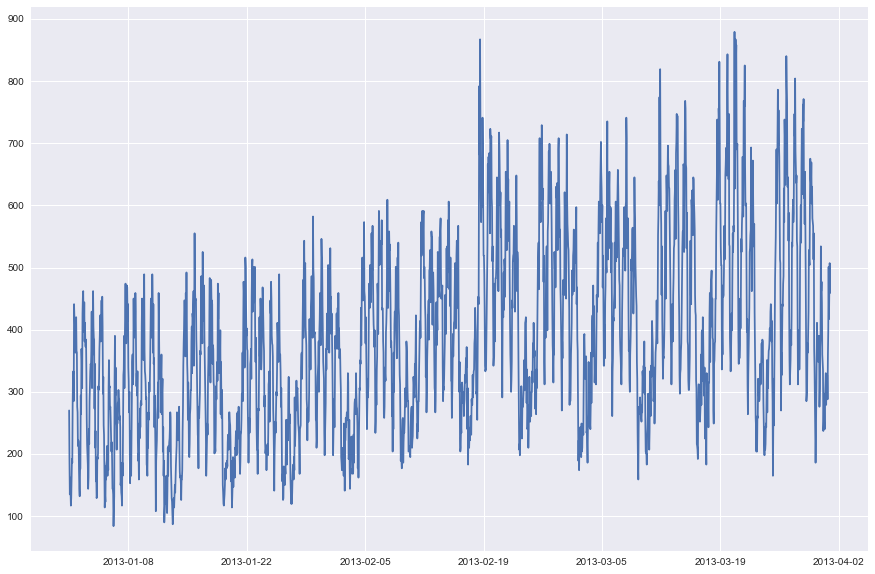

In [241]:
plt.plot(test_set)

In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [242]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=720)
    rolstd = pd.rolling_std(timeseries, window=720)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


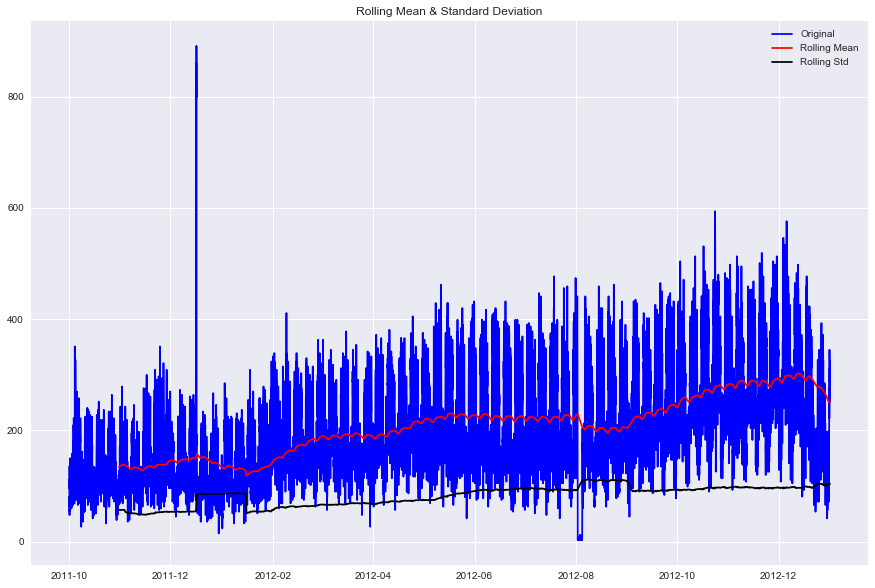

Results of Dickey-Fuller Test:
Test Statistic                -1.063234e+01
p-value                        5.175778e-19
#Lags Used                     3.900000e+01
Number of Observations Used    1.095200e+04
Critical Value (1%)           -3.430947e+00
Critical Value (5%)           -2.861804e+00
Critical Value (10%)          -2.566910e+00
dtype: float64


In [243]:
test_stationarity(train_set['Count'])

In [96]:
lag_acf = acf(train_set['Count'], nlags=200)
lag_pacf = pacf(train_set['Count'], nlags=20, method='ols')

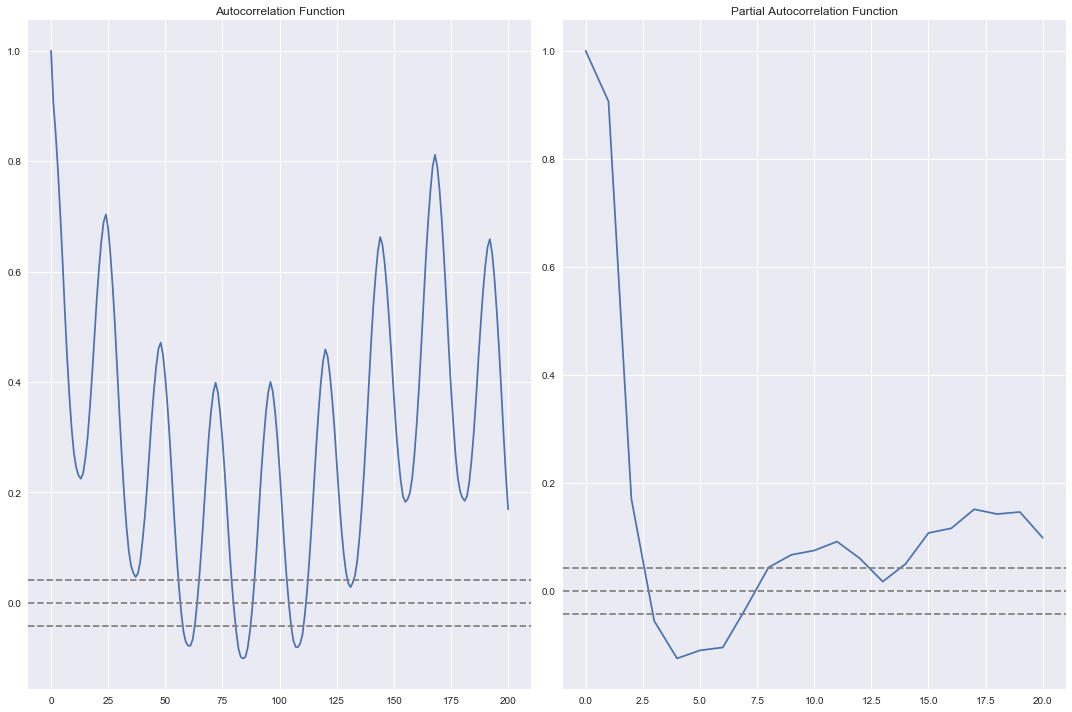

In [97]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test_set)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test_set)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test_set)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test_set)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

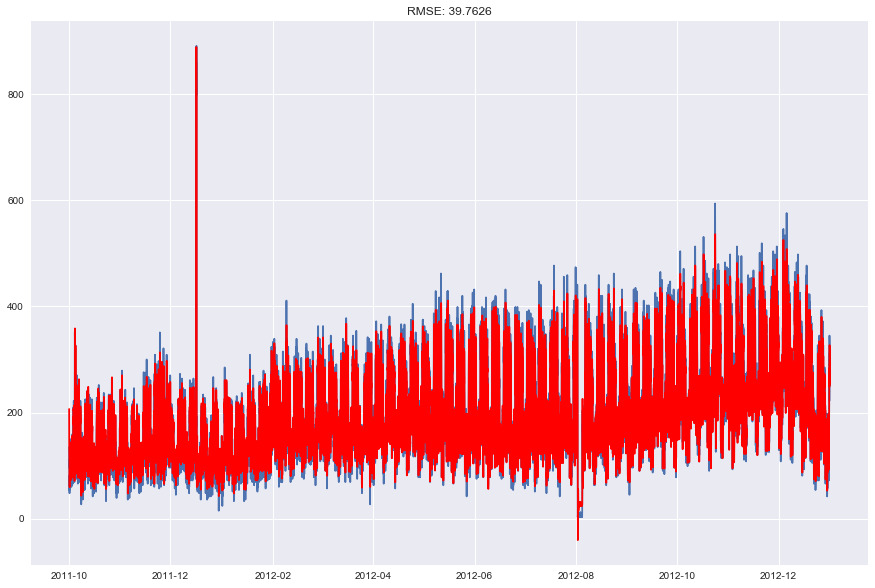

In [203]:
model = ARIMA(train_set, order=(3, 0, 2))  
results_AR = model.fit(disp=1)  
#plt.plot(train_set)
#plt.plot(results_AR.fittedvalues, color='red')
3plt.title('RMSE: %.4f'% np.sqrt(np.sum((results_AR.fittedvalues-train_set['Count'])**2)/len(train_set)))

In [255]:
history = [x for x in train_set['Count']]
predictions = list()

for i in range(len(test_set)):
    model = ARIMA(history, order=(5, 0, 2))  
    results_AR = model.fit(disp=1)
    op = results_AR.forecast()
    y_hat = op[0]
    predictions.append(y_hat)
    history.append(test_set['Count'][i])

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: Converge

/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/franklemuchahary/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: 

In [257]:
predictions 

2130

In [259]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_set['Count'][0:2130], predictions))

58.487958695249546

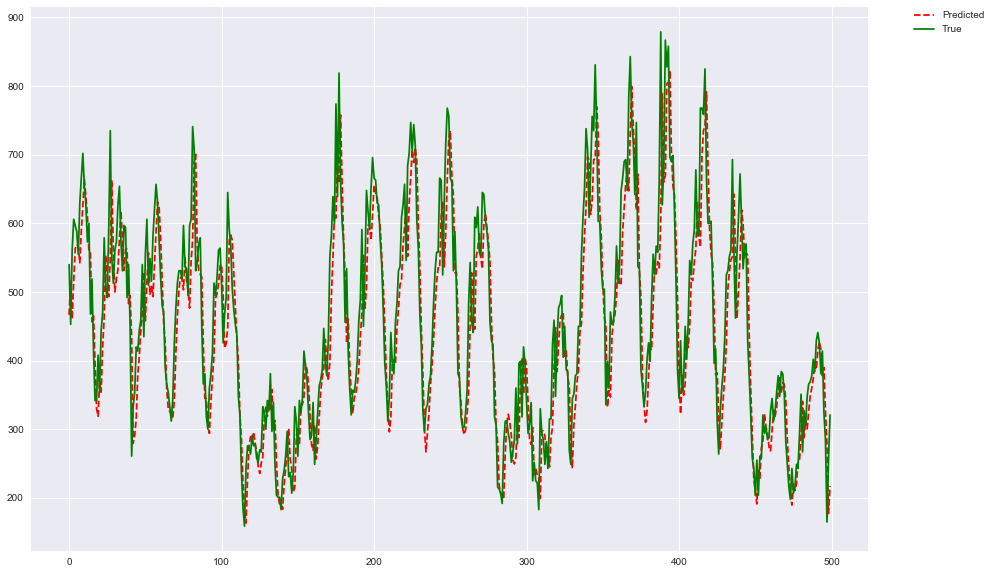

In [263]:
#import matplotlib.pyplot as plt

temp = pd.DataFrame({
    'preds':predictions[1500:2000],
    'true':test_set['Count'][1500:2000]
})

temp = temp.reset_index(drop=True)



plt.plot(temp['preds'], 'r--', label="Predicted")
plt.plot(temp['true'], 'g-', label="True")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(20,10))
plt.show()